<a href="https://colab.research.google.com/github/adilimam12/Classification-capstone-project-3/blob/main/Coronavirus_tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coronavirus Tweet Sentiment Analysis
Classification model

---



**Presented by**

Adil imam




**Github Link**

---


Adil imam-https://github.com/adilimam12/Classification-capstone-project-3


## Project Summary

---
In this project we are going to analyize the tweets to determine there sentiments, Sentiment Analysis is the process of computationally identifying and categorising opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, i.e., positive, negative, or neutral, is expressed in the piece of text. The tweets have been pulled from Twitter and manual tagging has been done. A large dataset is provided in this supervised classification machine learning project. We are given information like Location, Tweet At, Original Tweet, and Sentiment. The given challenge is to build a classification model to predict the sentiment of Covid-19 tweets

As we have implemented six different models to predict the sentiment of COVID-19 Tweets. Logistic Regression, Random Forest Classifier, Decision Tree, Naive Bayes, K Nearest Neighbour and Xgboost Classifier.

Logistic Regression model performed the best among them.

In this way, we can explore more from various textual data and tweets. Our models will try to predict the various sentiments correctly.


# **Problem description**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

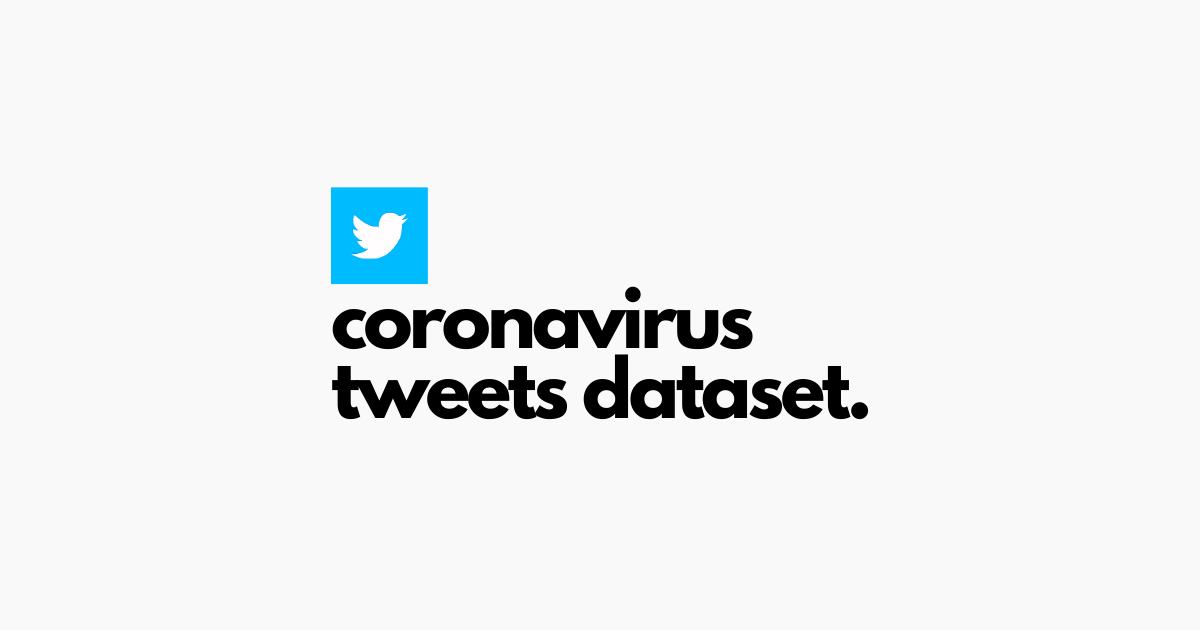

**Information Given :**

*Location = location (country) from where tweet is posted

*Tweet At = Date on which tweet is posted

*Original Tweet = Blog of tweet

*Label = Type of sentiments ('Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive')

**Project Work flow**

Steps followed:

1)Data Preparation

2)EDA

3)Feature engineering

4)Data cleaning

5)Model buliding

6)Evaluation of models

# Data preparation

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from wordcloud import wordcloud
import locale

import warnings
warnings.filterwarnings('ignore')


**Loading the data**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
covid_data=pd.read_csv("/content/drive/MyDrive/almabetter/capstone project 3/Coronavirus Tweets.csv",encoding='latin1')

**Some insights of the data**

---



In [ ]:
covid_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**This Dataset contains features like **

---
Username-encoded for privacy concerns

Screen name-encoded for privacy concerns

Location-Location of the person tweeting

TweetAt-time and date of the tweet

Orignal tweet-What people where tweeting in twitter

Sentiment-sentiment of the tweet 



**Exploring the data frame**

In [ ]:
#shape of the data
covid_data.shape

(41157, 6)

No of rows-41157

No of columns-6

**let's look for all the features present in our dataset **

---







In [ ]:
#checking all the columns
covid_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#datatype of the column
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are two numericsl column which is not required in our model building.
Here we are dealing with onlhy two columns Sentiment and Orignal tweet

In [ ]:
#checking the statistical details of all features
covid_data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [ ]:
#looking for duplicates
covid_data.duplicated().sum()

0

No duplicates found

**let's check null values **

---



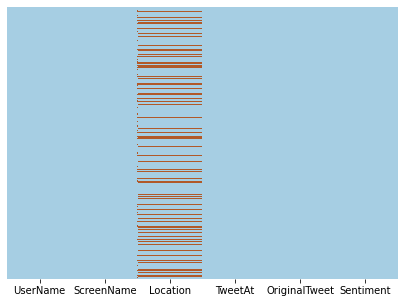

In [ ]:
# check for Null values
plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(covid_data.isnull(), cbar=False,yticklabels=False,cmap='Paired')


# **EDA**

---

*Location analysis*

In [ ]:
# Check for NAN count
covid_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

As we are not using location we will not treat NAN values we are using orignal tweet for our final prediction.

In [ ]:
#count of the location
top_location=covid_data['Location'].value_counts().head(10)
top_location


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

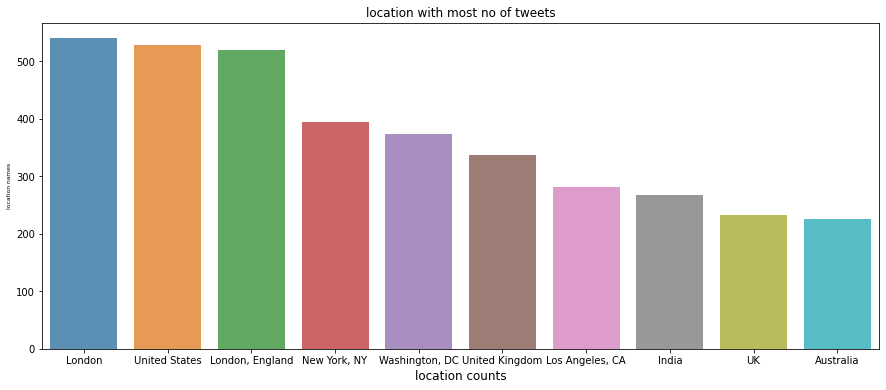

In [ ]:
#plotting count of the location
plt.figure(figsize=(15,6))
sns.barplot(top_location.index, top_location.values, alpha=0.8)
plt.title('location with most no of tweets')
plt.ylabel('location names', fontsize=6)
plt.xlabel('location counts', fontsize=12)
plt.show()

As we can seefrom above visualisation most number of tweets are coming from london

---



***Sentiment analysis***

In [ ]:
# count of Sentiments
sentiment_count=covid_data['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
covid_data.replace(replace_values,inplace=True)

In [ ]:
sentiment_count1 = covid_data['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


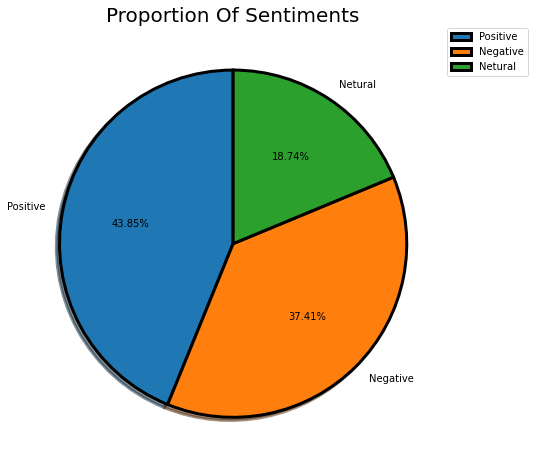

In [ ]:
#visualising proportion sentiments
# Plotting the piechart for Sentiments distribution
sentiment_count1 = covid_data['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(7,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1, shadow = True, startangle = 90,wedgeprops= {"edgecolor":"black",
                     'linewidth': 3,
                     'antialiased': True})
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axis('equal')
plt.show()

From the above Pie chart we can see that  around 44% people are tweeting positive and 37% are tweeting negative will rest of the people who are tweeting have a neutral opinion.

*Tweet date analysis*

---



In [ ]:
#checking the count of tweetAt column
covid_data['TweetAt'].value_counts().head(10)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
Name: TweetAt, dtype: int64

As we can see data type is integer type we have to change it date time format.

In [ ]:
#Converting TweetAt column into timestamp
covid_data["TweetAt"]=pd.to_datetime(covid_data["TweetAt"],dayfirst=True)

In [ ]:
type(covid_data["TweetAt"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
covid_data['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

We can see most no of tweets are from the month april and march

In [ ]:
#Lets extract the important features from TweetAt column.
covid_data["day_of_week"]=covid_data["TweetAt"].dt.strftime('%A')
covid_data["month"]=covid_data["TweetAt"].dt.strftime('%B')
covid_data["day_of_month"]=covid_data["TweetAt"].dt.day

In [ ]:
covid_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Monday,March,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,Monday,March,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Monday,March,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,Monday,March,16
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,Monday,March,16


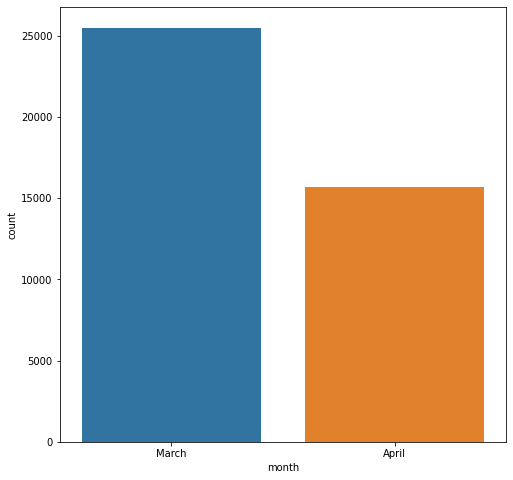

In [ ]:
#visualising which month most no of tweets are posted
plt.rcParams['figure.figsize']= (8,8)
sns.countplot(x= 'month', data= covid_data)
plt.show()

covid was spreading rapidly around these month so we can see maximum number of tweets are from the month of march more than 25000

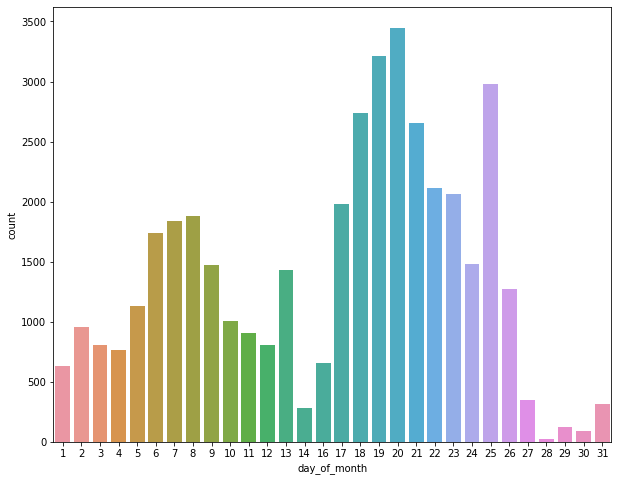

In [ ]:
#Plots showing Datewise tweets count  
plt.rcParams['figure.figsize']= (10,8)
sns.countplot(x= 'day_of_month', data= covid_data)
plt.show()

Most people Tweeted on 18 to 25th of the Month of March.
The World Health Organization on March 11, 2020, has declared coronavirus (COVID-19) outbreak a global pandemic.Thats why we see a spike in the tweet during this period of time.

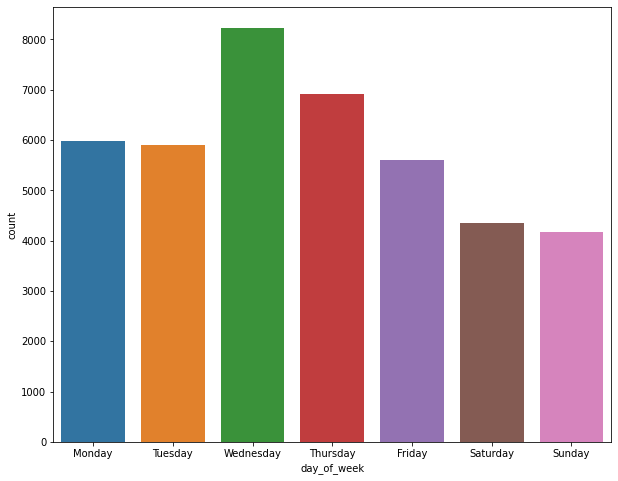

In [ ]:
# Plots showing weekly Tweets
plt.rcParams['figure.figsize']= (10,8)
sns.countplot(x= 'day_of_week', data= covid_data)
plt.show()

most people tweeted on tuesday and wednesday


***Unique values in every column***

---




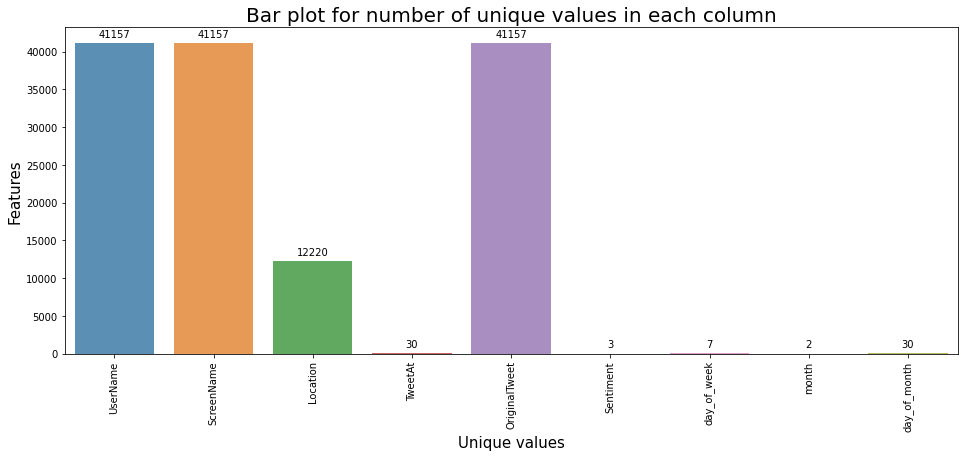

In [ ]:
# finding unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = covid_data.columns
unique = []
for i in covid_data.columns :
  unique.append(covid_data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(16,6))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches :
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column', fontsize=20)
plt.xlabel('Unique values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#importing necessary libraries
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from PIL import Image

there are 279122 combination of tweets


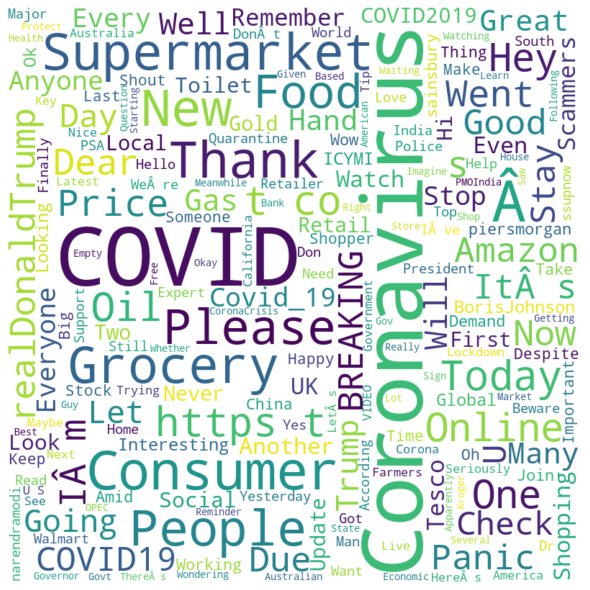

In [ ]:
# plotting word cloud
stopowords=set(STOPWORDS)
text = " ".join(tweets.split()[0] for tweets in covid_data.OriginalTweet)
print('there are {} combination of tweets'.format(len(text)))
word_cloud = WordCloud( background_color = 'white', width=800, height=800).generate(text)
plt.axis("off")
plt.rcParams["figure.figsize"] = (10,8)
plt.imshow(word_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.show()

clearly we can see from above wordcloud coronavirus was tweeted most followed by covid-19.






# **DATA PREPROCESSING**

---

Data preprocessing is an approach for cleaning and preparing text data for use in a specific context.

The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation(.,?,” etc.), special characters(@,%,&,$, etc.), numbers(1,2,3, etc.), tweeter handle, links(HTTPS: / HTTP:)and terms which don’t carry much weightage in context to the text.


In [ ]:
#import some liabrary for preprocessing.
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
covid_data.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Monday,March,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,Monday,March,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Monday,March,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,Monday,March,16
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,Monday,March,16


Here in our Orignal Tweet column we have "urls, hashtags, @Mentions" and many stop words and symbols, so lets remove them.

In [ ]:
# function to removr Urls, Mentions and Hashtags
def remove_noise(tweet):
  #remove @Mentions
  tweet= re.sub(r'@\w+','', tweet)
  # remove urls
  tweet = re.sub(r'http\S+', '', tweet)
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  return tweet

In [ ]:
covid_data['OriginalTweet'] = covid_data['OriginalTweet'].apply(remove_noise)

In [ ]:
covid_data['OriginalTweet'][1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

We have sucessfully removed Urls, mentions and hashtags from our tweets.

**Now remove stopwords and punctuation*

---



In [ ]:
#Funtion to remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [ ]:
# let apply the function
covid_data['OriginalTweet']= covid_data['OriginalTweet'].apply(remove_punctuation)

In [ ]:
covid_data['OriginalTweet'][1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

succesfully removed the punctuation.

**Removing stopwords* 

---



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
covid_data['OriginalTweet']= covid_data['OriginalTweet'].apply(stopwords)


In [ ]:
covid_data['OriginalTweet'][2]

'coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak'

We have successfully removed the stopwords

In [ ]:
# remove short words which have no meaning and shorter than 3.
covid_data['OriginalTweet'] = covid_data['OriginalTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

**Tokenizing**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
covid_data['OriginalTweet']= covid_data['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
covid_data['OriginalTweet'][3]

['food',
 'stock',
 'empty',
 'please',
 'dont',
 'panic',
 'enough',
 'food',
 'everyone',
 'take',
 'need',
 'stay',
 'calm',
 'stay',
 'safe']

In [ ]:
covid_data['length']=covid_data['OriginalTweet'].apply(lambda x: len(x))
covid_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month,length
0,3799,48751,London,2020-03-16,[],Neutral,Monday,March,16,0
1,3800,48752,UK,2020-03-16,"[advice, talk, neighbours, family, exchange, p...",Positive,Monday,March,16,25
2,3801,48753,Vagabonds,2020-03-16,"[coronavirus, australia, woolworths, give, eld...",Positive,Monday,March,16,12
3,3802,48754,NaN,2020-03-16,"[food, stock, empty, please, dont, panic, enou...",Positive,Monday,March,16,15
4,3803,48755,NaN,2020-03-16,"[ready, supermarket, outbreak, paranoid, food,...",Negative,Monday,March,16,15


In [ ]:
covid_data['length'].sort_values(ascending=False)

202      38
35866    33
24701    33
28687    33
37156    32
         ..
11258     0
35601     0
186       0
26924     0
0         0
Name: length, Length: 41157, dtype: int64

In [ ]:
covid_data['OriginalTweet'][37156]

['nisan',
 'cumartesi',
 'itibariyle',
 'bbâ\x92nin',
 'tã¼m',
 'hizmetleri',
 'sokaa',
 'ã§kma',
 'serbestisi',
 'olanlar',
 'iã§in',
 'devam',
 'edecek',
 'halk',
 'ekmek',
 'hamidiye',
 'ã¼retime',
 'geã§ti',
 'tã¼m',
 'stanbulâ\x92un',
 'ihtiyacna',
 'yetecek',
 'kapasitededir',
 'halkmz',
 'sakin',
 'olsun',
 'gã¼vende',
 'hissetsin',
 'lã¼tfen',
 'herkes',
 'evine',
 'dã¶nsã¼n']

We have a max length of 38 words in a single Tweet.

***Top words before stemming***

---



In [ ]:
#join all the words together
covid_data['OriginalTweet'] = covid_data['OriginalTweet'].apply(lambda x : " ".join(x))

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in covid_data['OriginalTweet']])


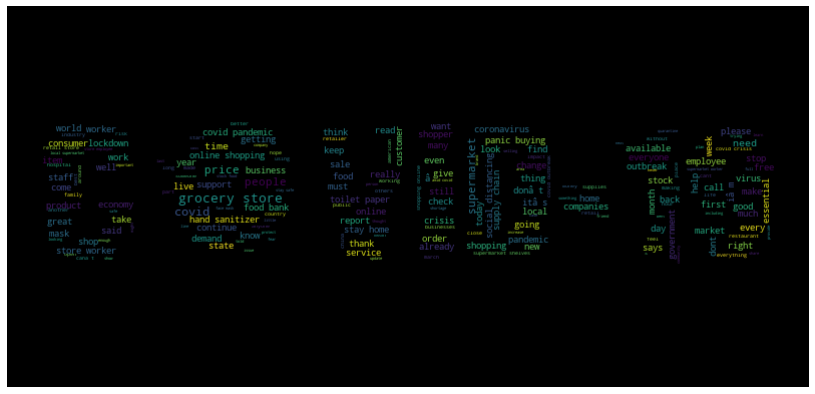

In [ ]:
from wordcloud import WordCloud
from PIL import Image
Image_file=('/content/drive/MyDrive/almabetter/capstone project 3/Covid-19.jpg')
mask=np.array(Image.open(Image_file))
wordcloud = WordCloud( background_color = 'black',mask=mask, width=1000, height=900)
wordcloud.generate(all_words)
image_colours=ImageColorGenerator(mask)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('covid', 10594),
 ('prices', 7800),
 ('store', 6747),
 ('food', 6746),
 ('supermarket', 6623),
 ('grocery', 6056),
 ('people', 5471),
 ('consumer', 4254),
 ('shopping', 3344),
 ('online', 3330),
 ('need', 2699),
 ('pandemic', 2663),
 ('s', 2572),
 ('workers', 2559),
 ('panic', 2410),
 ('like', 2360),
 ('time', 2271),
 ('demand', 2226),
 ('home', 2188),
 ('sanitizer', 2122)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

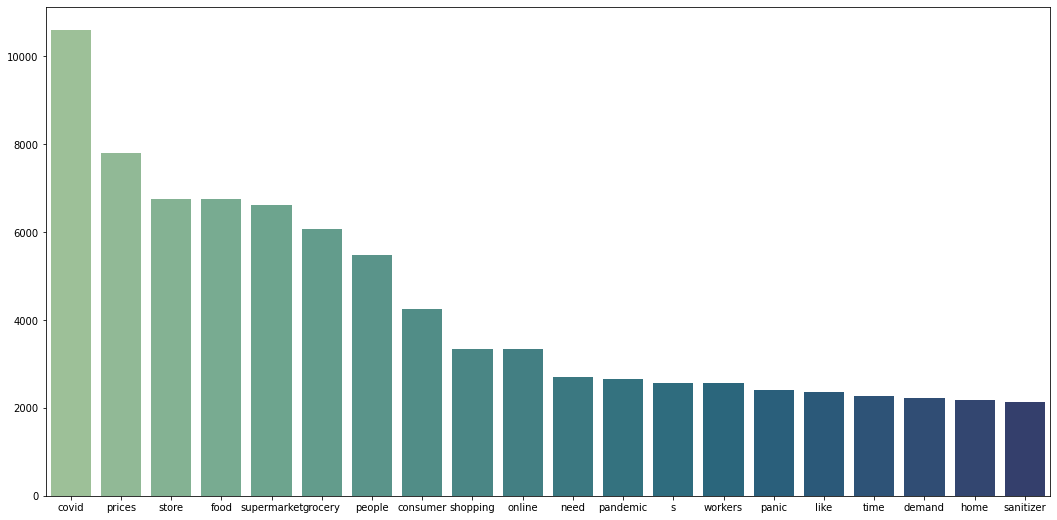

In [ ]:
plt.rcParams['figure.figsize']= (18,9)
sns.barplot(x , y,palette='crest')
plt.show()

***Stemming operation***

---



In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
covid_data['OriginalTweet']= covid_data['OriginalTweet'].apply(stemming)

***Top words After Stemming***

---



In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in covid_data['OriginalTweet']])

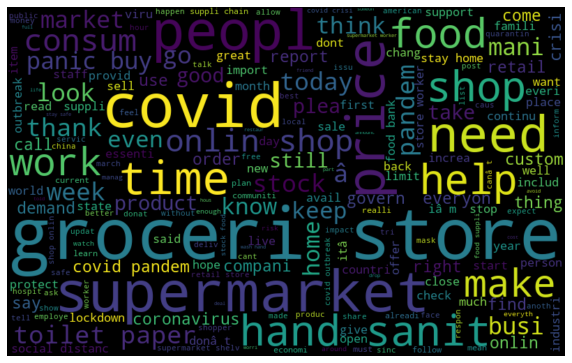

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'black', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('covid', 10594),
 ('price', 8920),
 ('store', 8103),
 ('supermarket', 7235),
 ('food', 6912),
 ('groceri', 6486),
 ('peopl', 5543),
 ('consum', 4935),
 ('shop', 4833),
 ('need', 3533),
 ('onlin', 3332),
 ('time', 3123),
 ('work', 2964),
 ('worker', 2865),
 ('pandem', 2684),
 ('like', 2681),
 ('hand', 2679),
 ('help', 2642),
 ('sanit', 2569),
 ('stock', 2494)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

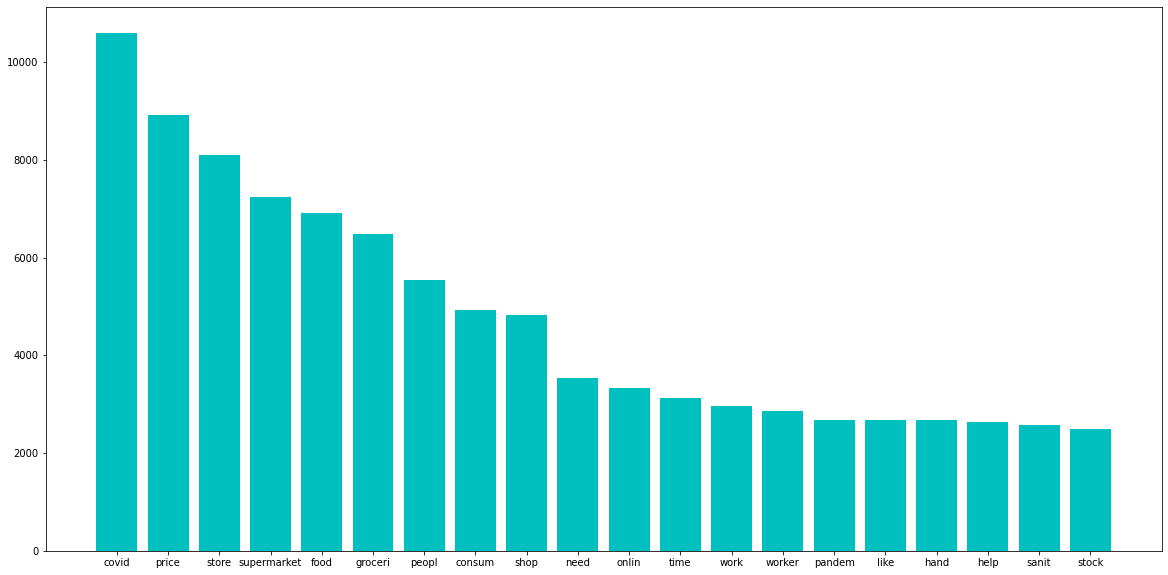

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
plt.bar(x , y,color='c')
plt.show()

We can see Covid, price, store, supermarket, food etc are most frequent words in our tweet data.

# Feature Engineering

---
***Feature encoding***


In [ ]:
# lets convert our dependent variable into numbers.

encoding = {'Negative': 0,
            'Neutral': 1,
            'Positive':2
            }

labels = ['Negative', 'Neutral', 'Positive']
           

covid_data['Sentiment'].replace(encoding, inplace=True) 

In [ ]:
covid_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month,length
0,3799,48751,London,2020-03-16,,1,Monday,March,16,0
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,2,Monday,March,16,25
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,2,Monday,March,16,12
3,3802,48754,NaN,2020-03-16,food stock empti pleas dont panic enough food ...,2,Monday,March,16,15
4,3803,48755,NaN,2020-03-16,readi supermarket outbreak paranoid food stock...,0,Monday,March,16,15


In [ ]:
covid_data.Sentiment.value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

***Vectorisation***

In [ ]:
# Lets create new dataset of cleaned Tweets.
new_df = covid_data[['OriginalTweet','Sentiment']]
new_df.head()

,OriginalTweet,Sentiment
0,,1
1,advic talk neighbour famili exchang phone numb...,2
2,coronavirus australia woolworth give elder dis...,2
3,food stock empti pleas dont panic enough food ...,2
4,readi supermarket outbreak paranoid food stock...,0


In [ ]:
new_df.shape

(41157, 2)

In [ ]:
X= new_df['OriginalTweet']
Y= new_df['Sentiment']

In [ ]:
#importing CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(41157, 5000)

# Model Building

---

***Train Test Split***

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#splitting the dataset into train and test  data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (28809, 5000)
X_test.shape :  (12348, 5000)
y_train.shape :  (28809,)
y_test.shape :  (12348,)


In [ ]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abat',
 'abid',
 'abil',
 'abl',
 'abroad',
 'abrupt',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abuja',
 'abund',
 'abus',
 'academ',
 'accc',
 'acceler',
 'accept',
 'access']

***Decision Tree***

---



In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test, average='weighted')
dtree_recall= recall_score(dtree_predictions,y_test, average='weighted')

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.4990281827016521
Precision : 0.8994299710666513
Recall : 0.4990281827016521


***Logistic Regression***

---







In [ ]:
#applying logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

#Performance Metrics
logreg_accuracy = accuracy_score(logreg_predictions,y_test)
logreg_precision = precision_score(logreg_predictions,y_test,average='weighted')
logreg_recall= recall_score(logreg_predictions,y_test,average='weighted')

print('Performance of Logistic Regression')
print('Accuracy :' ,logreg_accuracy)
print('Precision :', logreg_precision)
print('Recall :', logreg_recall)

Performance of Logistic Regression
Accuracy : 0.7948655652737285
Precision : 0.7944074219544606
Recall : 0.7948655652737285


***KNN classifier***

---







In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test, average='weighted')
knn_recall= recall_score(knn_predictions,y_test, average='weighted')

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.34021703919663104
Precision : 0.7942753480982444
Recall : 0.34021703919663104


***Naive Bayes Classifier***

---



In [ ]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predictions= mnb.predict(X_test)

#Performance Metrics
mnb_accuracy= accuracy_score(mnb_predictions,y_test)
mnb_precision= precision_score(mnb_predictions,y_test, average='weighted')
mnb_recall= recall_score(mnb_predictions,y_test, average='weighted')

print('Performance of Naive Bayes classifier')
print('Accuracy :' ,mnb_accuracy)
print('Precision :',mnb_precision)
print('Recall :',mnb_recall)

Performance of Naive Bayes classifier
Accuracy : 0.6867508908325235
Precision : 0.6928456220182466
Recall : 0.6867508908325235


***Random Forest Classifier***

---







In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier(n_estimators=100)
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test, average='weighted')
rcf_recall= recall_score(rcf_predictions,y_test, average='weighted')

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.7734855847100746
Precision : 0.7756083333698143
Recall : 0.7734855847100746


***XG Boost Classifier***

---



In [ ]:
#XGBoost Classifier
import xgboost as xgb
xgbcf = MultinomialNB()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= mnb.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test, average='weighted')
xgbcf_recall= recall_score(xgbcf_predictions,y_test, average='weighted')

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.6867508908325235
Precision : 0.6928456220182466
Recall : 0.6867508908325235


***Comparison perfomance of all classifier***

---



In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'Naive Bayes', 
              'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, mnb_accuracy, rcf_accuracy, xgbcf_accuracy, ],
    'Precision': [dtree_precision, logreg_precision, knn_precision, mnb_precision, rcf_precision, xgbcf_precision, ],
    'Recall': [dtree_recall, logreg_recall, knn_recall, mnb_recall, rcf_recall, xgbcf_recall, ]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy,Precision,Recall
1,Logistic Regression,0.794866,0.794407,0.794866
4,Random Forest,0.773486,0.775608,0.773486
3,Naive Bayes,0.686751,0.692846,0.686751
5,XGBoost,0.686751,0.692846,0.686751
0,Decision Tree,0.499028,0.899430,0.499028
2,K Nearest Neighbour,0.340217,0.794275,0.340217


Observation:


We can see from above table that Logistic Regression have highest Test Accuracy.

Xgboost also have best r2 and Adjusted r2 score.

It also have minimum MSE,RMSE,MAE and MAPE errors.

From above observations we can say that Logistic regression is the best Model.

# **Conclusion**

***Conclusion On EDA***

---

Original Dataset contains 6 columns and 41157 rows.

Location column contains null values. So, we have dropped the null values.


After dropping and adding a new column, now we have 7 columns and 32567 rows.

In order to analyze the data we required only two columns "OriginalTweet" and "Sentiment".

The columns such as "UserName" and "ScreenName" does not give any meaningful insights for our analysis.

There are five types of sentiments - Extremely Positive, Positive, Extremely Negative, Negative and Neutral.

We have renamed the Extremely Positive and Extremely Negative sentiments to Positive and Negative respectively. And we are left with three types of sentiments - Positive, Negative and Neutral.

The pie chart shows the proportion of sentiments.

Bar plot for unique values shows us the number of unique values in each column.

The graphical representation of top 10 locations shows us that most of the tweets came from London followed by United States.




***Conclusion on Model training***

---

As we have implemented six different models to predict the sentiment of COVID-19 Tweets.
 Logistic Regression, Random Forest Classifier, Decision Tree, Naive Bayes, K Nearest Neighbour and Xgboost Classifier.

Logistic Regression model performed the best among them.

In this way, we can explore more from various textual data and tweets. Our models will try to predict the various sentiments correctly.